In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [97]:
# set some globals, which are used across the remaining functions
Image_width = 28
Image_height = 28
Image_Channels = 1
IMAGE_SHAPE = (Image_width,Image_height,Image_Channels)
NUM_CLASSES = 10
# training parameters
NUM_EPOCHS = 30
BATCH_SIZE = 128

In [83]:
# No Test labels so not using!! 
# train_df = pd.read_csv("../kaggleData/train.csv")
# test_df = pd.read_csv("../kaggleData/test.csv")

# y_train = train_df['label']
# X_train = train_df.drop('label', axis=1)
# X_test = test_df

(8400, 784)

## Data  Cleaning and Parsing

In [4]:
train_df = pd.read_csv("../kaggleData/train.csv")
# test_df = pd.read_csv("../kaggleData/test.csv")

fullX = train_df.iloc[:, 1:].values # get all row for every other column
fullY = train_df.iloc[:, :1].values # get every row for label
length = fullX.shape[0]
X_train, X_test, y_train, y_test = train_test_split(fullX, fullY, test_size = 0.2, random_state=1)

In [49]:
X_train = X_train.reshape(33600, 28, 28)
X_test = X_test.reshape(8400, 28, 28)

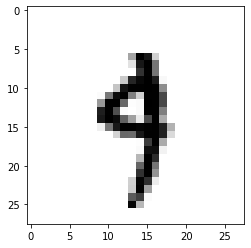

In [55]:
image_index = 3332# may select anything up to 60,000
plt.imshow(X_train[image_index], cmap='binary') # Show the image

In [6]:
X_train = (X_train.astype('float32') / 255.0)
X_test = (X_test.astype('float32') / 255.0)

x_shape = X_train.shape
x_shape

(33600, 784)

## Creating Simple TensorFlow model

In [100]:
# Testing Ott's Cats and dog model
model = Sequential()

# should feed in input shape [28,28]
# only looking at image height and width

model.add(Flatten(input_shape=[28,28]))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                510       
Total params: 573,104
Trainable params: 573,104
Non-trainable params: 0
_______________________________________________

In [102]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=NUM_EPOCHS)

Epoch 1/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.8461 - accuracy: 0.7668
Epoch 2/30
1050/1050 [==============================] - 2s 1ms/step - loss: 0.2983 - accuracy: 0.9124
Epoch 3/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2262 - accuracy: 0.9342
Epoch 4/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1844 - accuracy: 0.9470
Epoch 5/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1543 - accuracy: 0.9558
Epoch 6/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1318 - accuracy: 0.9617
Epoch 7/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1134 - accuracy: 0.9670
Epoch 8/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0972 - accuracy: 0.9713
Epoch 9/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 10/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.073

## Plotting our predicted Values with the digit image

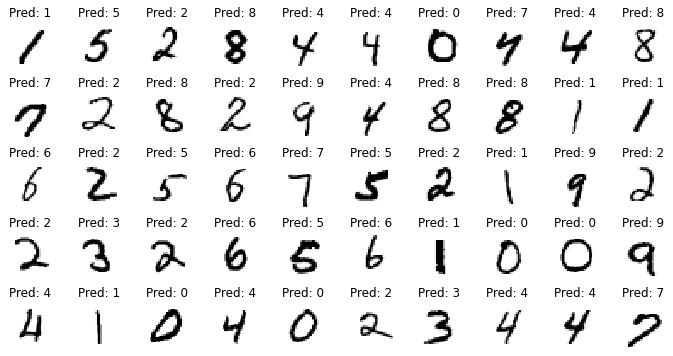

In [86]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Accuracy of Model

In [105]:
#  predicting the number and selecting the digit that is most probable 
prediction = model.predict(X_test)
predictedValue = prediction.argmax(axis=1)

# Comparing predicted digit to the actual digit value to determine the accuracy of the model
accuracy = np.mean(y_test.ravel() == predictedValue.ravel())
accuracy

0.9763095238095238

## Results from doing these tests

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))
            
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

### accuracy^ 0.9792857142857143

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))
            
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

### Accuracy ^ 0.9783333333333334

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

### Accuracy ^ 0.9763095238095238

## Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
potato = confusion_matrix(y_test, newVals)
potato

array([[843,   0,   2,   0,   0,   2,   4,   2,   0,   0],
       [  0, 933,   2,   1,   0,   0,   1,   0,   3,   0],
       [  0,   2, 818,   1,   1,   0,   0,   6,   7,   0],
       [  0,   0,   9, 840,   0,  14,   1,   3,   3,   3],
       [  0,   1,   1,   0, 811,   0,   1,   7,   0,   8],
       [  2,   1,   2,   9,   1, 706,   4,   1,   3,   2],
       [  2,   0,   2,   0,   3,   2, 789,   0,   1,   1],
       [  0,   2,   4,   1,   2,   1,   0, 832,   0,   8],
       [  1,   3,   0,   3,   2,   4,   4,   2, 823,   4],
       [  2,   0,   0,   2,  12,   4,   0,  10,   3, 810]], dtype=int64)

In [73]:
preds = model.predict_classes(X_test)
output_dict = {"ImageId": np.arange(1, len(preds) + 1, 1), "label": preds}
preds_df = pd.DataFrame(output_dict)

In [ ]:
preds_df

In [ ]:
preds

In [ ]:
model.score(X_train,X_test)

In [34]:
model = Sequential()

# only looking at image height and width
model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

# Create Pyramid-like sequence for neural net
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation='softmax')) # output activation should be softmax for classication > 2 output classes

# Convolution Models

In [107]:
K.clear_session()

from tensorflow.keras.utils import to_categorical

print('Before preprocessing:')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

# one-hot encode labels to 10 output classes corresponding to digits 0-9
y_train = to_categorical(y_train, 10)

# reshape the image arrays (make 2D arrays instead of 3D arrays)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print('After preprocessing: ')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

Before preprocessing:
 - X_train.shape = (33600, 28, 28), y_train.shape = (33600, 1)
 - X_test.shape = (8400, 28, 28)
After preprocessing: 
 - X_train.shape = (33600, 28, 28, 1), y_train.shape = (33600, 10)
 - X_test.shape = (8400, 28, 28, 1)


In [108]:
def build_model():
    K.clear_session()
    
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dropout(0.45))
    # output is softmax for 10 classes
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          3

In [115]:
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [116]:
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE)

Epoch 1/20
263/263 [==============================] - 17s 65ms/step - loss: 0.0326 - acc: 0.9896
Epoch 2/20
263/263 [==============================] - 16s 61ms/step - loss: 0.0251 - acc: 0.9921
Epoch 3/20
263/263 [==============================] - 16s 60ms/step - loss: 0.0225 - acc: 0.9930 0s - loss: 0.0226 - acc: 0.
Epoch 4/20
263/263 [==============================] - 16s 61ms/step - loss: 0.0203 - acc: 0.9936
Epoch 5/20
263/263 [==============================] - 16s 61ms/step - loss: 0.0194 - acc: 0.9935
Epoch 6/20
263/263 [==============================] - 16s 60ms/step - loss: 0.0198 - acc: 0.9937
Epoch 7/20
263/263 [==============================] - 16s 60ms/step - loss: 0.0192 - acc: 0.9940
Epoch 8/20
263/263 [==============================] - 16s 61ms/step - loss: 0.0154 - acc: 0.9952
Epoch 9/20
263/263 [==============================] - 16s 62ms/step - loss: 0.0189 - acc: 0.9939
Epoch 10/20
263/263 [==============================] - 17s 64ms/step - loss: 0.0157 - acc: 0.9946
E

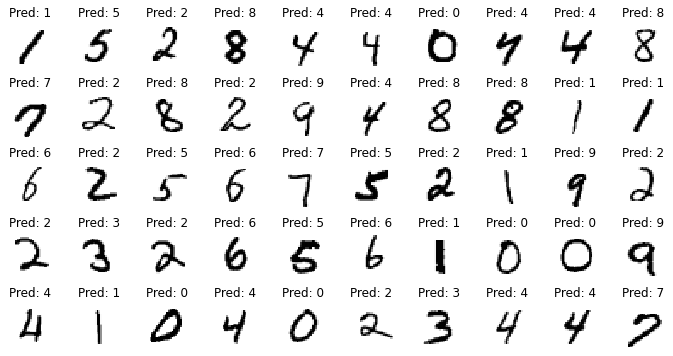

In [112]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index].mean(axis=2), cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [117]:
#  predicting the number and selecting the digit that is most probable 
prediction = model.predict(X_test)
predictedValue = prediction.argmax(axis=1)

# Comparing predicted digit to the actual digit value to determine the accuracy of the model
accuracy = np.mean(y_test.ravel() == predictedValue.ravel())
accuracy

0.9878571428571429

## Results with Convolution
BATCH_SIZE = 50
NUM_EPOCHS = 5

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
                    
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45)) #output is softmax for 10 classes

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

### 0.9864285714285714

BATCH_SIZE = 128
NUM_EPOCHS = 20

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
                    
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45)) #output is softmax for 10 classes

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

### 0.9878571428571429

## Notes from the Ott

In [ ]:
# gives you 0 and positive values 
# fast and simple weights/outputs 

# normalizes the coefficients so the weights 
# behaves more stably especially during fitting. 
model.add(BatchNormalization())

# drops out 50% of the batch nodes randomly 
# forces the model to be less perfect. Avoid overfitting 
model.add(Dropout(0.5))

# returns valid probabilities
# softmax good for categorical variables
# gives you valid probabilities 
model.add(Dense(10, activation='softmax'))